# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math
import skimage.io as io
import numpy as np
from skimage.util import random_noise
from skimage import filters

%matplotlib inline
%load_ext autoreload
%autoreload 2

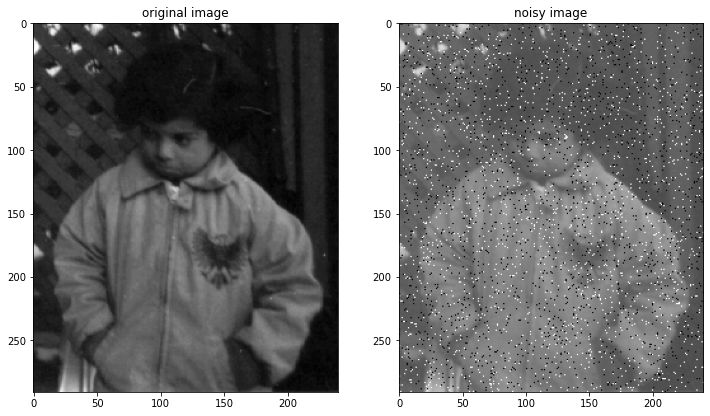

In [2]:
img = io.imread('pout.tif')
noisy_image = random_noise(img,mode = "s&p",amount = 0.05)
show_images([img,noisy_image],["original image","noisy image"])

In [3]:
'''
(1) Your own median filter algorithm
'''
def median_filter(img,window_width,window_height):
    edgex = window_width // 2
    edgey = window_height // 2
    filtered_img = np.zeros((img.shape[0],img.shape[1]))
    for x in range(edgex,img.shape[1]-edgex):
        for y in range(edgey,img.shape[0]-edgey):
            color_array = np.zeros((window_height,window_width))
            for fx in range(0,window_width):
                for fy in range(0,window_height):
                    color_array[fy][fx] = img[y+fy-edgey][x+fx-edgex]
                    
            color_array = np.sort(color_array.flatten())
            filtered_img[y][x] = color_array[(window_height*window_width) // 2]
    return filtered_img



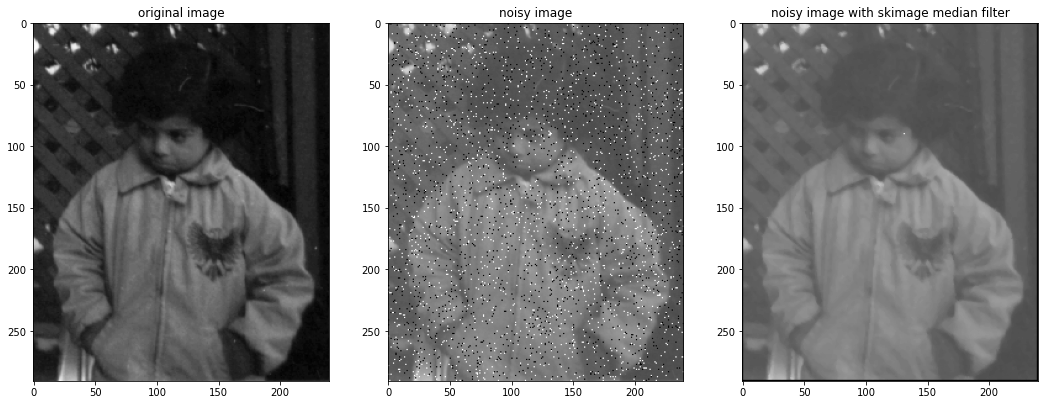

In [4]:
median_filtered_img = median_filter(noisy_image,3,3)
show_images([img,noisy_image,median_filtered_img],["original image","noisy image","noisy image with skimage median filter"])

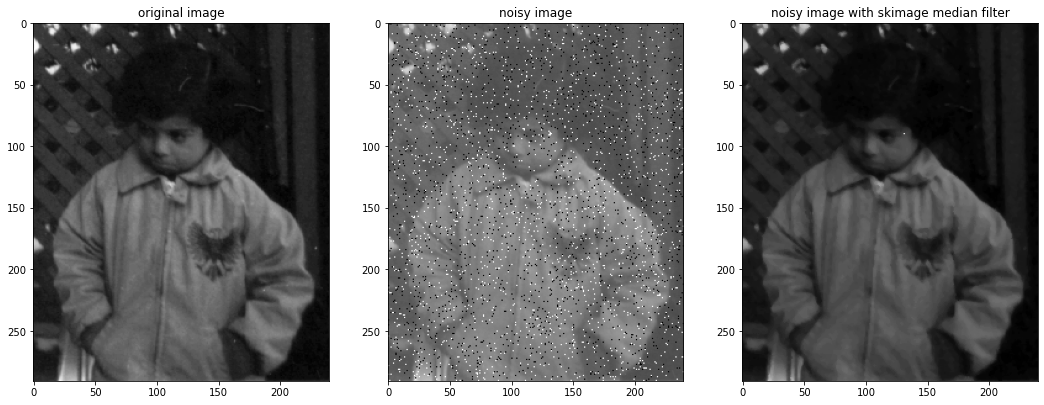

In [5]:
'''
(2) skimage median filter
'''
ski_median_filtered_img = filters.median(noisy_image)
show_images([img,noisy_image,ski_median_filtered_img],["original image","noisy image","noisy image with skimage median filter"])

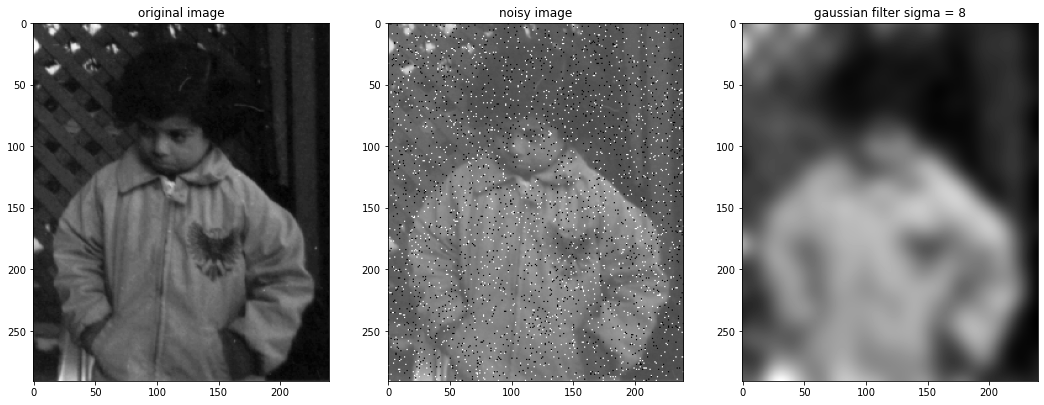

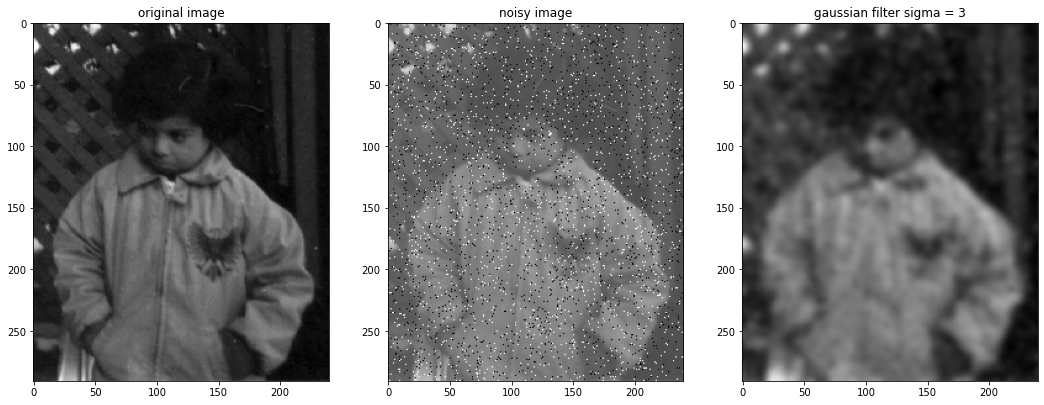

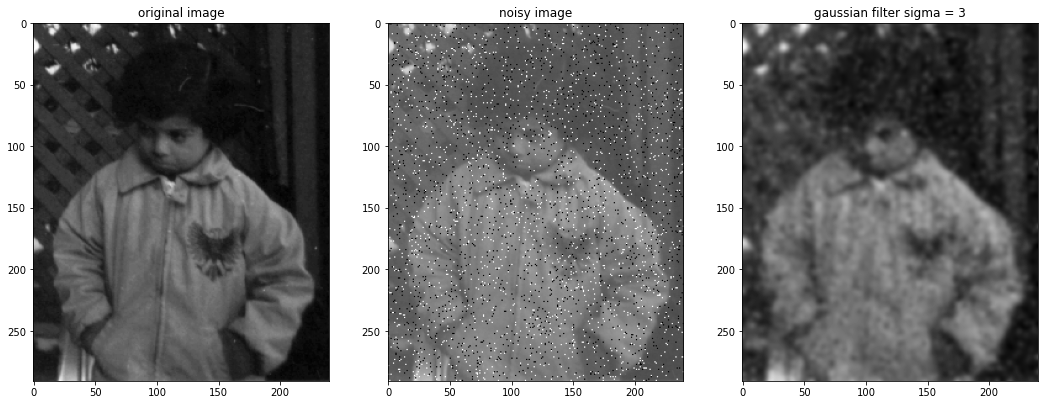

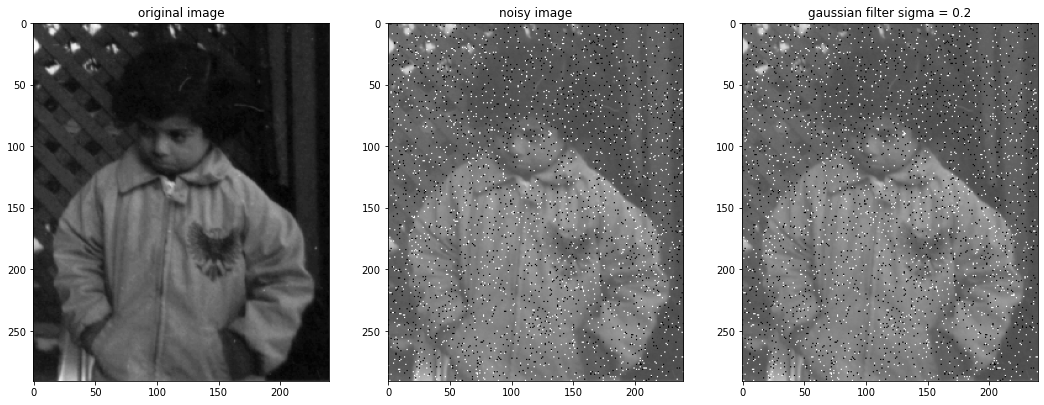

In [11]:
'''
(3) Gaussion Filters
'''
ski_gaussian_filtered_img_8 = filters.gaussian(noisy_image,sigma = 8)
ski_gaussian_filtered_img_3 = filters.gaussian(noisy_image,sigma = 3)
ski_gaussian_filtered_img_15 = filters.gaussian(noisy_image,sigma = 2)
ski_gaussian_filtered_img_02 = filters.gaussian(noisy_image,sigma = 0.2)

show_images([img,noisy_image,ski_gaussian_filtered_img_8],["original image","noisy image","gaussian filter sigma = 8"])
show_images([img,noisy_image,ski_gaussian_filtered_img_3],["original image","noisy image","gaussian filter sigma = 3"])
show_images([img,noisy_image,ski_gaussian_filtered_img_15],["original image","noisy image","gaussian filter sigma = 3"])
show_images([img,noisy_image,ski_gaussian_filtered_img_02],["original image","noisy image","gaussian filter sigma = 0.2"])